In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#importing several required packages
import numpy as np
import pandas as pd 
import seaborn as sns
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from keras import utils as np_utils
from keras import optimizers

In [3]:
#splitting the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("Dataset successfully loaded!!!")
print(x_train.shape, y_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
Dataset successfully loaded!!!
(60000, 28, 28) (60000,)


8


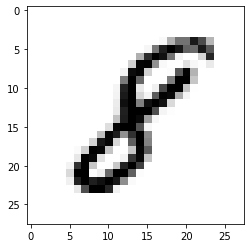

In [4]:

import matplotlib.pyplot as plt
image_index = 7777 
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], ' - Train samples')
print(x_test.shape[0], ' - Test samples')

x_train shape: (60000, 28, 28, 1)
60000  - Train samples
10000  - Test samples


In [7]:
batch_size = 128
num_classes = 10
epochs = 10

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(32, activation=tf.nn.relu))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation=tf.nn.softmax))

2021-11-28 15:23:46.444883: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-28 15:23:46.586604: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-28 15:23:46.587619: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-28 15:23:46.589139: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [9]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

2021-11-28 15:23:49.804671: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2021-11-28 15:23:51.696632: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


469/469 [==============================] - 10s 6ms/step - loss: 0.7050 - accuracy: 0.7691 - val_loss: 0.1048 - val_accuracy: 0.9739
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2150 - accuracy: 0.9438 - val_loss: 0.0770 - val_accuracy: 0.9820
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1527 - accuracy: 0.9605 - val_loss: 0.0560 - val_accuracy: 0.9879
Epoch 4/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1239 - accuracy: 0.9675 - val_loss: 0.0643 - val_accuracy: 0.9859
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1063 - accuracy: 0.9720 - val_loss: 0.0577 - val_accuracy: 0.9884
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0974 - accuracy: 0.9752 - val_loss: 0.0598 - val_accuracy: 0.9870
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0929 - accuracy: 0.9755 - val_loss: 0.0553 - val_accuracy: 0.9895
Epoch 8/10
469/4

In [10]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0477 - accuracy: 0.9914
Test loss: 0.04769239202141762
Test accuracy: 0.9914000034332275


In [11]:
model.save('model.h5') 
print("Saving the CNN model as model.h5")

Saving the CNN model as model.h5
